# Practical 8

## Aim: Perform the Linear Discriminant Analysis(LDA) on Wine Dataset. 

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
sns.set()

In [4]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [5]:
X.shape

(178, 13)

In [6]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
df = X.join(pd.Series(y, name='class'))

In [9]:
# Linear Discriminant Analysis can be broken up into the following steps:
# 1. Compute the within class and between class scatter matrices
# 2. Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
# 3. Sort the eigenvalues and select the top k
# 4. Create a new matrix containing eigenvectors that map to the k eigenvalues
# 5. Obtain the new features (i.e. LDA components) by taking the dot product of the data
# the matrix from step 4

In [10]:
# Within Class Scatter Matrix
# For every class, we create a vector with the means of each feature.
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

C:\Users\ANIKET KUMAR\AppData\Local\Temp\ipykernel_22248\3318147336.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [11]:
# Within class scatter matrix
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
    s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s

In [12]:
# Between Class Scatter Matrix
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1) 
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

C:\Users\ANIKET KUMAR\AppData\Local\Temp\ipykernel_22248\2311331513.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = df.mean()


In [13]:
# Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).
dot(between_class_scatter_matrix))

In [14]:
# The eigenvectors with the highest eigenvalues carry the most information about the
# distribution of the data. Thus, we sort the eigenvalues from highest to lowest and sel
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
         print(pair[0])

9.884546449232959
2.9033610617160557
1.0444363444302075e-15
8.711241874538138e-16
5.7817751670189425e-16
5.7817751670189425e-16
4.440892098500626e-16
3.8704064817367815e-16
3.8704064817367815e-16
2.1874393679972937e-16
1.3862874076008528e-16
1.3862874076008528e-16
3.657021451995239e-18


In [15]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.7729604269322251
Eigenvector 1: 0.22703957306777484
Eigenvector 2: 8.167374869860142e-17
Eigenvector 3: 6.812093274118198e-17
Eigenvector 4: 4.521283221722227e-17
Eigenvector 5: 4.521283221722227e-17
Eigenvector 6: 3.4727277271112036e-17
Eigenvector 7: 3.026614384271185e-17
Eigenvector 8: 3.026614384271185e-17
Eigenvector 9: 1.710553009649473e-17
Eigenvector 10: 1.084061177650771e-17
Eigenvector 11: 1.084061177650771e-17
Eigenvector 12: 2.859749688417823e-19


In [16]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real
w_matrix

array([[-4.1562e-02,  2.0879e-01],
       [-1.6684e-02,  3.6500e-03],
       [-4.4776e-03,  4.5911e-01],
       [ 7.5359e-03, -2.4950e-02],
       [ 6.4335e-03,  3.1071e-03],
       [ 9.7213e-02,  1.9083e-01],
       [-7.2041e-01,  2.6494e-02],
       [-6.5156e-01,  3.4334e-01],
       [ 1.6083e-02, -4.0468e-01],
       [ 2.7091e-02,  6.7012e-03],
       [-1.9634e-02, -5.7682e-01],
       [-2.0866e-01, -3.0567e-01],
       [-5.9173e-04,  9.9706e-04]])

In [17]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.7729604269322251
Eigenvector 1: 0.22703957306777484
Eigenvector 2: 8.167374869860142e-17
Eigenvector 3: 6.812093274118198e-17
Eigenvector 4: 4.521283221722227e-17
Eigenvector 5: 4.521283221722227e-17
Eigenvector 6: 3.4727277271112036e-17
Eigenvector 7: 3.026614384271185e-17
Eigenvector 8: 3.026614384271185e-17
Eigenvector 9: 1.710553009649473e-17
Eigenvector 10: 1.084061177650771e-17
Eigenvector 11: 1.084061177650771e-17
Eigenvector 12: 2.859749688417823e-19


In [18]:
X_lda = np.array(X.dot(w_matrix))

In [19]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

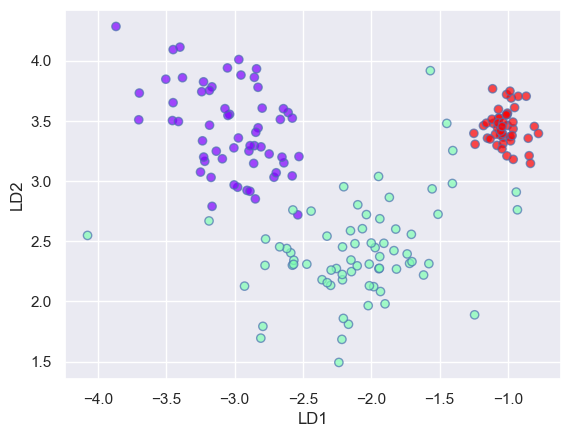

In [20]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
X_lda[:,0],
X_lda[:,1],
c=y,
cmap='rainbow',
alpha=0.7,
edgecolors='b'
)

In [21]:
# **************************** LDA Using Scikit-learn *********************************

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [23]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

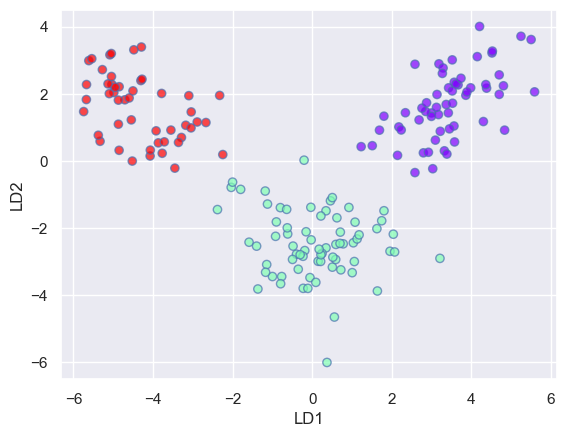

In [24]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
X_lda[:,0],
X_lda[:,1],
c=y,
cmap='rainbow',
alpha=0.7,
edgecolors='b'
)